# Derivation of Simpson's quadrature

Consider the points $x_0$, $x_1$, $x_2$: $x_1 = (x_0 + x_2)/2$.  Use Lagrangian interpolation for $y_i = f(x_i)$.  Integral of the interpolation polynomial gives the quadrature.

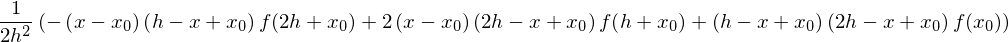

In [1]:
from sympy import *
init_printing()
x,x0,h=symbols('x x0 h')

# interpolation nodes
x1 = x0+h
x2 = x0+2*h
f  = Function('f')
y0 = f(x0)
y1 = f(x1)
y2 = f(x2)
# Lagrange polynomials
L0 = (x-x1)*(x-x2)/((x0-x1)*(x0-x2))
L1 = (x-x0)*(x-x2)/((x1-x0)*(x1-x2))
L2 = (x-x0)*(x-x1)/((x2-x0)*(x2-x1))
# interpolation polynomial
p  = y0*L0 + y1*L1 + y2*L2
simplify(p)

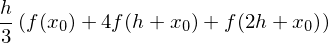

In [2]:
# integrate the interpolation polynomial
simplify(integrate(p,(x,x0,x2)))

Error of Simpson's formula:
\begin{equation*}
    \int_{x+0}^{x_2} E(x) \,\mathrm{d}x = - \frac{h^5}{90}f^{(4)}(c), \qquad c \in [x_0,x_2]
\end{equation*}

**Therefore Simpson's quadrature is exact for cubic polynomials**

In [3]:
c0,c1,c2,c3=symbols('c0 c1 c2 c3')
q = Lambda(x,c0 + c1*x + c2*x**2 + c3*x**3)
q

Exact integral of q:

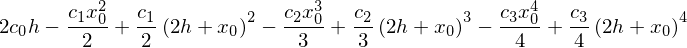

In [4]:
exact_integral = integrate(q(x),(x,x0,x2))
simplify(exact_integral)

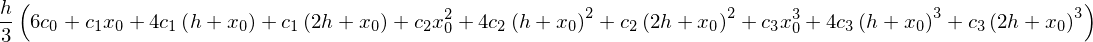

In [5]:
simpson_quadrature = h/3*(q(x0)+4*q(x1)+q(x2))
simplify(simpson_quadrature)

In [6]:
simplify(simpson_quadrature-exact_integral)